In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [29]:
import pandas as pd

url = "https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Loan%20Application%20Status/loan_prediction.csv"

try:
    df = pd.read_csv(url, on_bad_lines='skip')
    print("Initial DataFrame:")
    print(df.head())

    print("\nColumn names before cleaning:")
    print(df.columns)
    df.columns = ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 
                  'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 
                  'Credit_History', 'Property_Area', 'Loan_Status']
    
    print("\nColumn names after cleaning:")
    print(df.columns)
    
    # Display the cleaned DataFrame
    print("\nCleaned DataFrame:")
    print(df.head())

except pd.errors.ParserError as e:
    print("ParserError:", e)



Initial DataFrame:
   LP001002  Male   No  0      Graduate No.1  5849     0.1  Unnamed: 8    360  \
0  LP001003  Male  Yes  1      Graduate   No  4583  1508.0       128.0  360.0   
1  LP001005  Male  Yes  0      Graduate  Yes  3000     0.0        66.0  360.0   
2  LP001006  Male  Yes  0  Not Graduate   No  2583  2358.0       120.0  360.0   
3  LP001008  Male   No  0      Graduate   No  6000     0.0       141.0  360.0   
4  LP001011  Male  Yes  2      Graduate  Yes  5417  4196.0       267.0  360.0   

     1  Urban  Y  
0  1.0  Rural  N  
1  1.0  Urban  Y  
2  1.0  Urban  Y  
3  1.0  Urban  Y  
4  1.0  Urban  Y  

Column names before cleaning:
Index(['LP001002', 'Male', 'No', '0', 'Graduate', 'No.1', '5849', '0.1',
       'Unnamed: 8', '360', '1', 'Urban', 'Y'],
      dtype='object')

Column names after cleaning:
Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Cred

In [30]:
df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [ ]:
#  Data Preprocessing and Visualization

In [7]:
obj = (df.dtypes == 'object') 
print("Categorical variables:",len(list(obj[obj].index)))

Categorical variables: 8


In [31]:
df.drop(['Loan_ID'],axis=1,inplace=True)

In [ ]:
# As LoanID is completely unique and not correlated with any of the other column, So we will drop it using .drop() function.

In [32]:
df.head(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


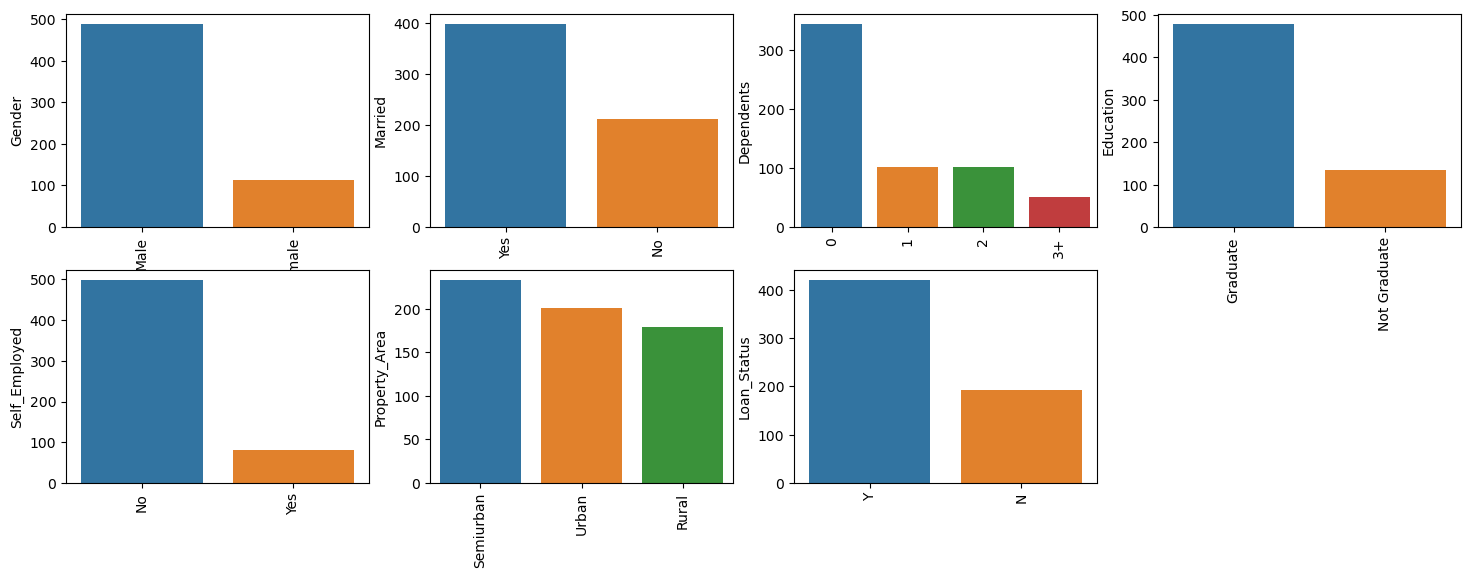

In [33]:
obj = (df.dtypes == 'object') 
object_cols = list(obj[obj].index) 
plt.figure(figsize=(18,36)) 
index = 1
  
for col in object_cols: 
  y = df[col].value_counts() 
  plt.subplot(11,4,index) 
  plt.xticks(rotation=90) 
  sns.barplot(x=list(y.index), y=y) 
  index +=1

In [35]:
# Import label encoder 
from sklearn import preprocessing 
    
# label_encoder object knows how  
# to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
obj = (df.dtypes == 'object') 
for col in list(obj[obj].index): 
  df[col] = label_encoder.fit_transform(df[col])

In [20]:
# Again check the object datatype columns. Let’s find out if there is still any left.  

In [36]:
# To find the number of columns with  
# datatype==object 
obj = (df.dtypes == 'object') 
print("Categorical variables:",len(list(obj[obj].index)))

Categorical variables: 0


<Axes: >

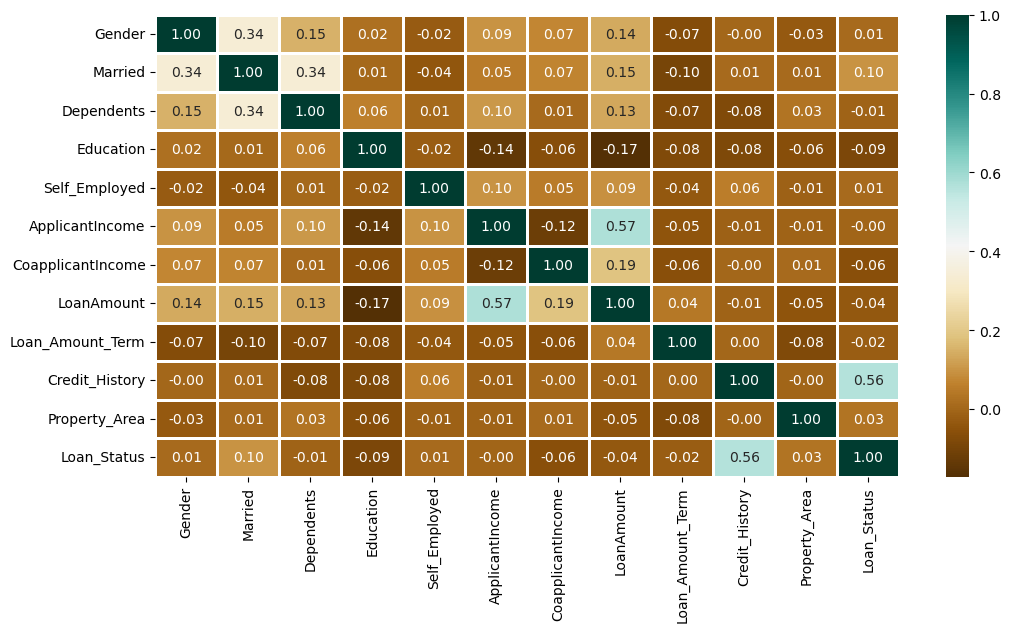

In [37]:
# Correletion


plt.figure(figsize=(12,6)) 
  
sns.heatmap(df.corr(),cmap='BrBG',fmt='.2f', 
            linewidths=2,annot=True)

In [41]:
for col in df.columns: 
  df[col] = df[col].fillna(df[col].mean())  
    
df.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [ ]:
# As there is no missing value then we must proceed to model training.

# Splitting Dataset 

In [44]:
from sklearn.model_selection import train_test_split 
  
X = df.drop(['Loan_Status'],axis=1) 
Y = df['Loan_Status'] 
X.shape,Y.shape 
  
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                                                    test_size=0.4, 
                                                    random_state=1) 
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((367, 11), (246, 11), (367,), (246,))

In [45]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.svm import SVC 
from sklearn.linear_model import LogisticRegression 
  
from sklearn import metrics 
  
knn = KNeighborsClassifier(n_neighbors=3) 
rfc = RandomForestClassifier(n_estimators = 7, 
                             criterion = 'entropy', 
                             random_state =7) 
svc = SVC() 
lc = LogisticRegression() 
  
# making predictions on the training set 
for clf in (rfc, knn, svc,lc): 
    clf.fit(X_train, Y_train) 
    Y_pred = clf.predict(X_train) 
    print("Accuracy score of ", 
          clf.__class__.__name__, 
          "=",100*metrics.accuracy_score(Y_train,  
                                         Y_pred))

Accuracy score of  RandomForestClassifier = 96.73024523160763
Accuracy score of  KNeighborsClassifier = 80.10899182561307
Accuracy score of  SVC = 70.29972752043598
Accuracy score of  LogisticRegression = 82.01634877384197


In [46]:
# Prediction on the test set

# making predictions on the testing set 
for clf in (rfc, knn, svc,lc): 
    clf.fit(X_train, Y_train) 
    Y_pred = clf.predict(X_test) 
    print("Accuracy score of ", 
          clf.__class__.__name__,"=", 
          100*metrics.accuracy_score(Y_test, 
                                     Y_pred))

Accuracy score of  RandomForestClassifier = 77.23577235772358
Accuracy score of  KNeighborsClassifier = 58.94308943089431
Accuracy score of  SVC = 67.47967479674797
Accuracy score of  LogisticRegression = 79.67479674796748


In [ ]:
# Random Forest Classifier is giving the best accuracy with an accuracy score of 82% for the testing dataset. And to get much better results ensemble learning techniques like Bagging and Boosting can also be used.